# **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
import numpy as np
import os
import datetime
import math

!pip install backtrader
%matplotlib inline
import backtrader as bt

# --- General Plotting Setup (run this once in your notebook/script) ---
plt.rcParams['figure.figsize'] = [18, 10] # Default figure size
plt.rcParams['figure.dpi'] = 100 # Default DPI

!git clone https://github.com/ssnsbr/crypto-bt-strategy.git
!ls

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 5.6 MB/s eta 0:00:00
Cloning into 'crypto-bt-strategy'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 23 (delta 5), reused 23 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 23.54 KiB | 3.36 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [5]:
!cp -r crypto-bt-strategy/* .
!ls

crypto-bt-strategy  main.py  run.ipynb	sample_data  sizers  strategies  utils


In [7]:

from sizers.ScalperMartingaleSizer import ScalperMartingaleSizer
from strategies.FastScalperStrategy import FastScalperStrategy
from strategies.FiboMartingaleStrategy import FiboMartingaleStrategy
from utils.data_utils import ready_df
from utils.runner import run_all  # Import pandas for data preparation

from utils.plotting_utils import *

# **Data**

In [10]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Define path to your CSV files
folder_path = '/content/drive/MyDrive/charts/1s/'

# List all CSV files
csv_files = [folder_path+f for f in os.listdir(folder_path) if f.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files.")
print(csv_files[0])

Found 92 CSV files.
/content/drive/MyDrive/charts/1s/axiom_chart_bars_486Xt5hwoXJGEzMDyow5yDWeVdfE8TLDeWfXCn653T6h_1749643558081.csv


In [12]:


print(ready_df(pd.read_csv(csv_files[9]),True).head(2))
df=pd.read_csv(csv_files[9])
df = ready_df(df)
print(df.head())

df.head()



Preparing dataframe with size  1414
             datetime         open          high          low        close  \
0 2025-06-10 22:35:21  5064.766132   5064.766132  5064.766132  5064.766132   
1 2025-06-10 22:35:22  5064.766132  13798.563261  5708.258201  8449.435946   

        volume      timestamp  color  
0   489.594059  1749594921000    red  
1  8944.654253  1749594922000  green  
Preparing dataframe with size  1414
             datetime      open      high       low     close       volume  \
0 2025-06-10 22:35:21  0.000005  0.000005  0.000005  0.000005   489.594059   
1 2025-06-10 22:35:22  0.000005  0.000014  0.000006  0.000008  8944.654253   
2 2025-06-10 22:35:23  0.000008  0.000008  0.000008  0.000008    53.983319   
3 2025-06-10 22:35:25  0.000008  0.000008  0.000008  0.000008   242.179975   
4 2025-06-10 22:35:26  0.000008  0.000009  0.000008  0.000009   503.739603   

       timestamp  color  
0  1749594921000    red  
1  1749594922000  green  
2  1749594923000    red  
3  

,datetime,open,high,low,close,volume,timestamp,color
0,2025-06-10 22:35:21,0.000005,0.000005,0.000005,0.000005,489.594059,1749594921000,red
1,2025-06-10 22:35:22,0.000005,0.000014,0.000006,0.000008,8944.654253,1749594922000,green
2,2025-06-10 22:35:23,0.000008,0.000008,0.000008,0.000008,53.983319,1749594923000,red
3,2025-06-10 22:35:25,0.000008,0.000008,0.000008,0.000008,242.179975,1749594925000,green
4,2025-06-10 22:35:26,0.000008,0.000009,0.000008,0.000009,503.739603,1749594926000,green


# Strategy

## Sizer

## Strategy

# Run

In [18]:
# sizer_params = {"initial_buy_amount_factor":strategy_class.params.initial_buy_amount_factor,  # buggy, it reads default values of strategy_class
#                  "martingale_multiplier":strategy_class.params.martingale_multiplier,  # buggy, it reads default values of strategy_class
#                  "data_in_market_cap": mcap,
#                  "log":sizer_log}
mcap=True
log=True
sizer_log=True
strategy_class=FastScalperStrategy
strategy_params={'data_in_market_cap': mcap,"log":log}
sizer_class=ScalperMartingaleSizer
sizer_params = {
    "initial_buy_amount_factor": strategy_params.get('initial_buy_amount_factor', 0.05),
    "martingale_multiplier": strategy_params.get('martingale_multiplier', 2.0),
    "data_in_market_cap": mcap,
    "log": sizer_log
}
# all_results_df, all_cerebros_objects, all_portfolio_histories = run_all(["/content/15s_axiom_chart_bars_Ekv9HdumWqnXZgq5G6ge6bk1ZRHKXYC2WnSFL94sQmLJ_1752166201266.csv"],
#                                                                         sizer_class=sizer_class,
#                                                                         strategy_class=strategy_class,
#                                                                         strategy_params=strategy_params,
#                                                                         sizer_params=sizer_params,
#                                                                         cash = 1000,
#                                                                         commission=0.1,
#                                                                         mcap=mcap,
#                                                                         )


# if __name__ == '__main__':
# Step 1: Run all backtests
all_results_df, all_cerebros_objects, all_portfolio_histories = run_all(csv_files[:10],
                                                                        sizer_class=sizer_class,
                                                                        strategy_class=strategy_class,
                                                                        strategy_params=strategy_params,
                                                                        sizer_params=sizer_params,
                                                                        cash = 10,
                                                                        commission=0.1,
                                                                        mcap=mcap,
                                                                        )



Streaming output truncated to the last 5000 lines.
1249 2025-06-11, INITIAL BUY (RSI < 40): Attempting to buy at 44841.2473913
Sizer using fixed amount for buy!
Sizer: Initial Buy Size Calculated: 2230, Next Martingale Qty: 4460.00, Next Martingale Cash: 0.2000
1249 2025-06-11, BUY EXECUTED, Price: 44.84K, Cost: 0.09999598168259899, Comm: 0.0099995981682599, Size: 2230.00
1249 2025-06-11, Change in cash value cash:9.87975831086408 ,value:9.98352760460146
1259 2025-06-11, TAKE PROFIT! Selling all 2230.00 units. MarketCap: 53.25K, TP Target: 47.08K
1259 2025-06-11, SELL EXECUTED, Price: 53.25K, Cost: 0.09999598168259899, Comm: 0.0118754184351187, Size: -2230.00
1259 2025-06-11, All positions closed. Resetting strategy state.
Sizer state reset.
1259 2025-06-11, Strategy state reset.
1259 2025-06-11, TRADE PNL, Gross 18758202.67, Net -3116813.93
1259 2025-06-11, Change in cash value cash:9.986637076780147 ,value:9.986637076780147
1323 2025-06-11, INITIAL BUY (RSI < 40): Attempting to buy a

# **Results**

In [19]:
# Step 2: Display the aggregated results DataFrame
g = all_results_df[all_results_df["start_value"]<all_results_df["final_value"]]
print(f"{len(g)} of {len(all_results_df)} were profitable!")
print(g)
print("\n--- Aggregated Backtest Results ---")

all_results_df

0 of 10 were profitable!
Empty DataFrame
Columns: [coin, start_value, final_value, sharpe_ratio, max_drawdown, total_trades, winning_trades, losing_trades, annualized_return]
Index: []

--- Aggregated Backtest Results ---


,coin,start_value,final_value,sharpe_ratio,max_drawdown,total_trades,winning_trades,losing_trades,annualized_return
0,486Xt5hwoX,10,4.216710,None,57.832900,28,0,28,-0.034549
1,9wU18EfCJ1,10,5.578807,None,44.295711,45,2,43,-0.028845
2,4j8YYsNYu7,10,2.811605,None,71.883947,87,0,87,-0.015224
3,EmyYqKto6z,10,4.697487,None,63.996027,47,0,47,-0.011485
4,A6CcANcQj7,10,8.188133,None,27.351969,11,1,10,-0.056453
5,E3AfczT6uU,10,4.576782,None,59.084964,58,1,57,-0.020485
6,3Kqvhawn8S,10,4.265456,None,62.035718,36,0,36,-0.018096
7,oBrg497k6L,10,5.185974,None,48.279785,24,2,22,-0.044387
8,DCoY7uY7i2,10,8.602831,None,14.150227,19,1,18,-0.016870
9,3Kinv5zxQs,10,5.476463,None,67.286397,11,0,11,-0.042574


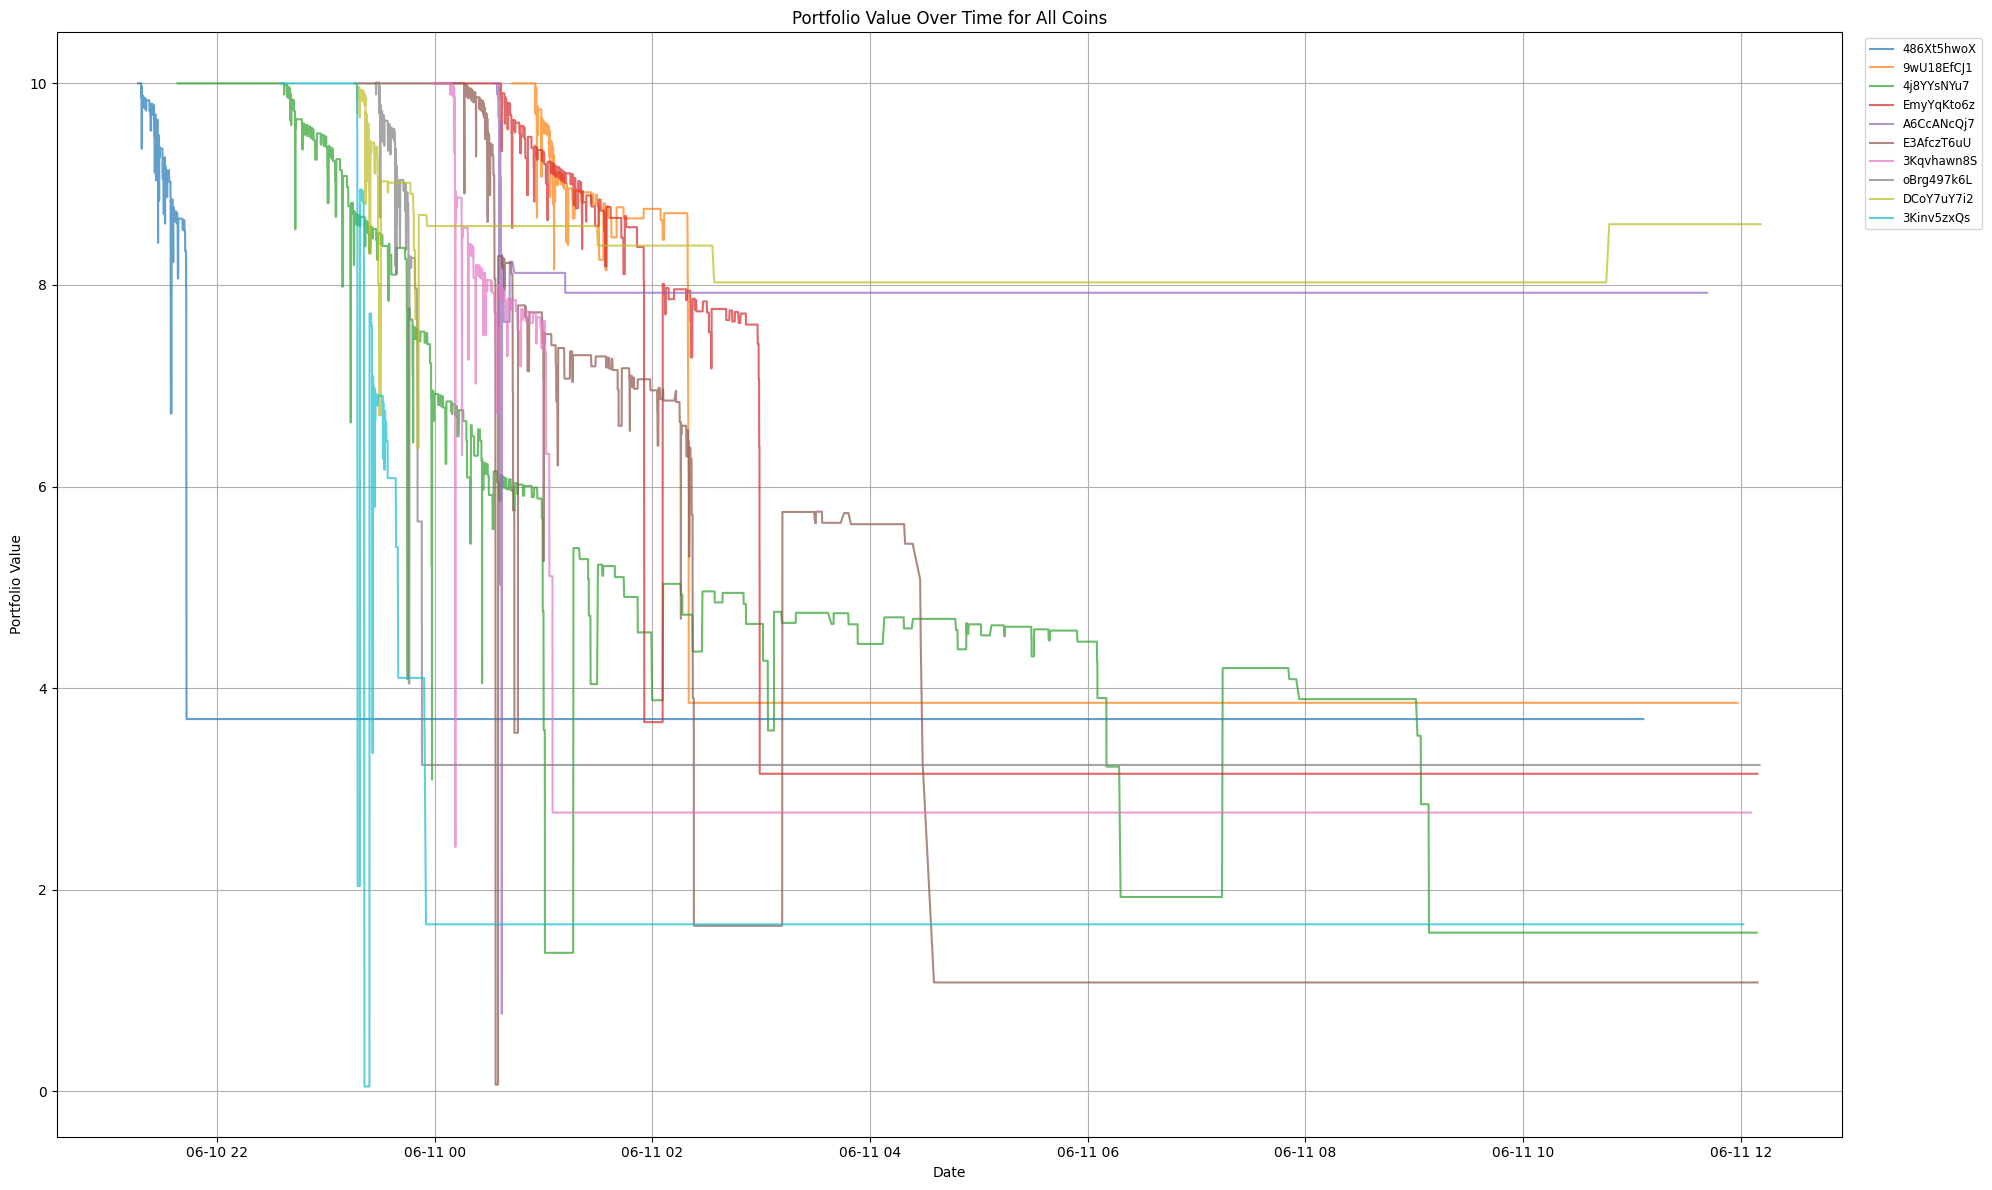

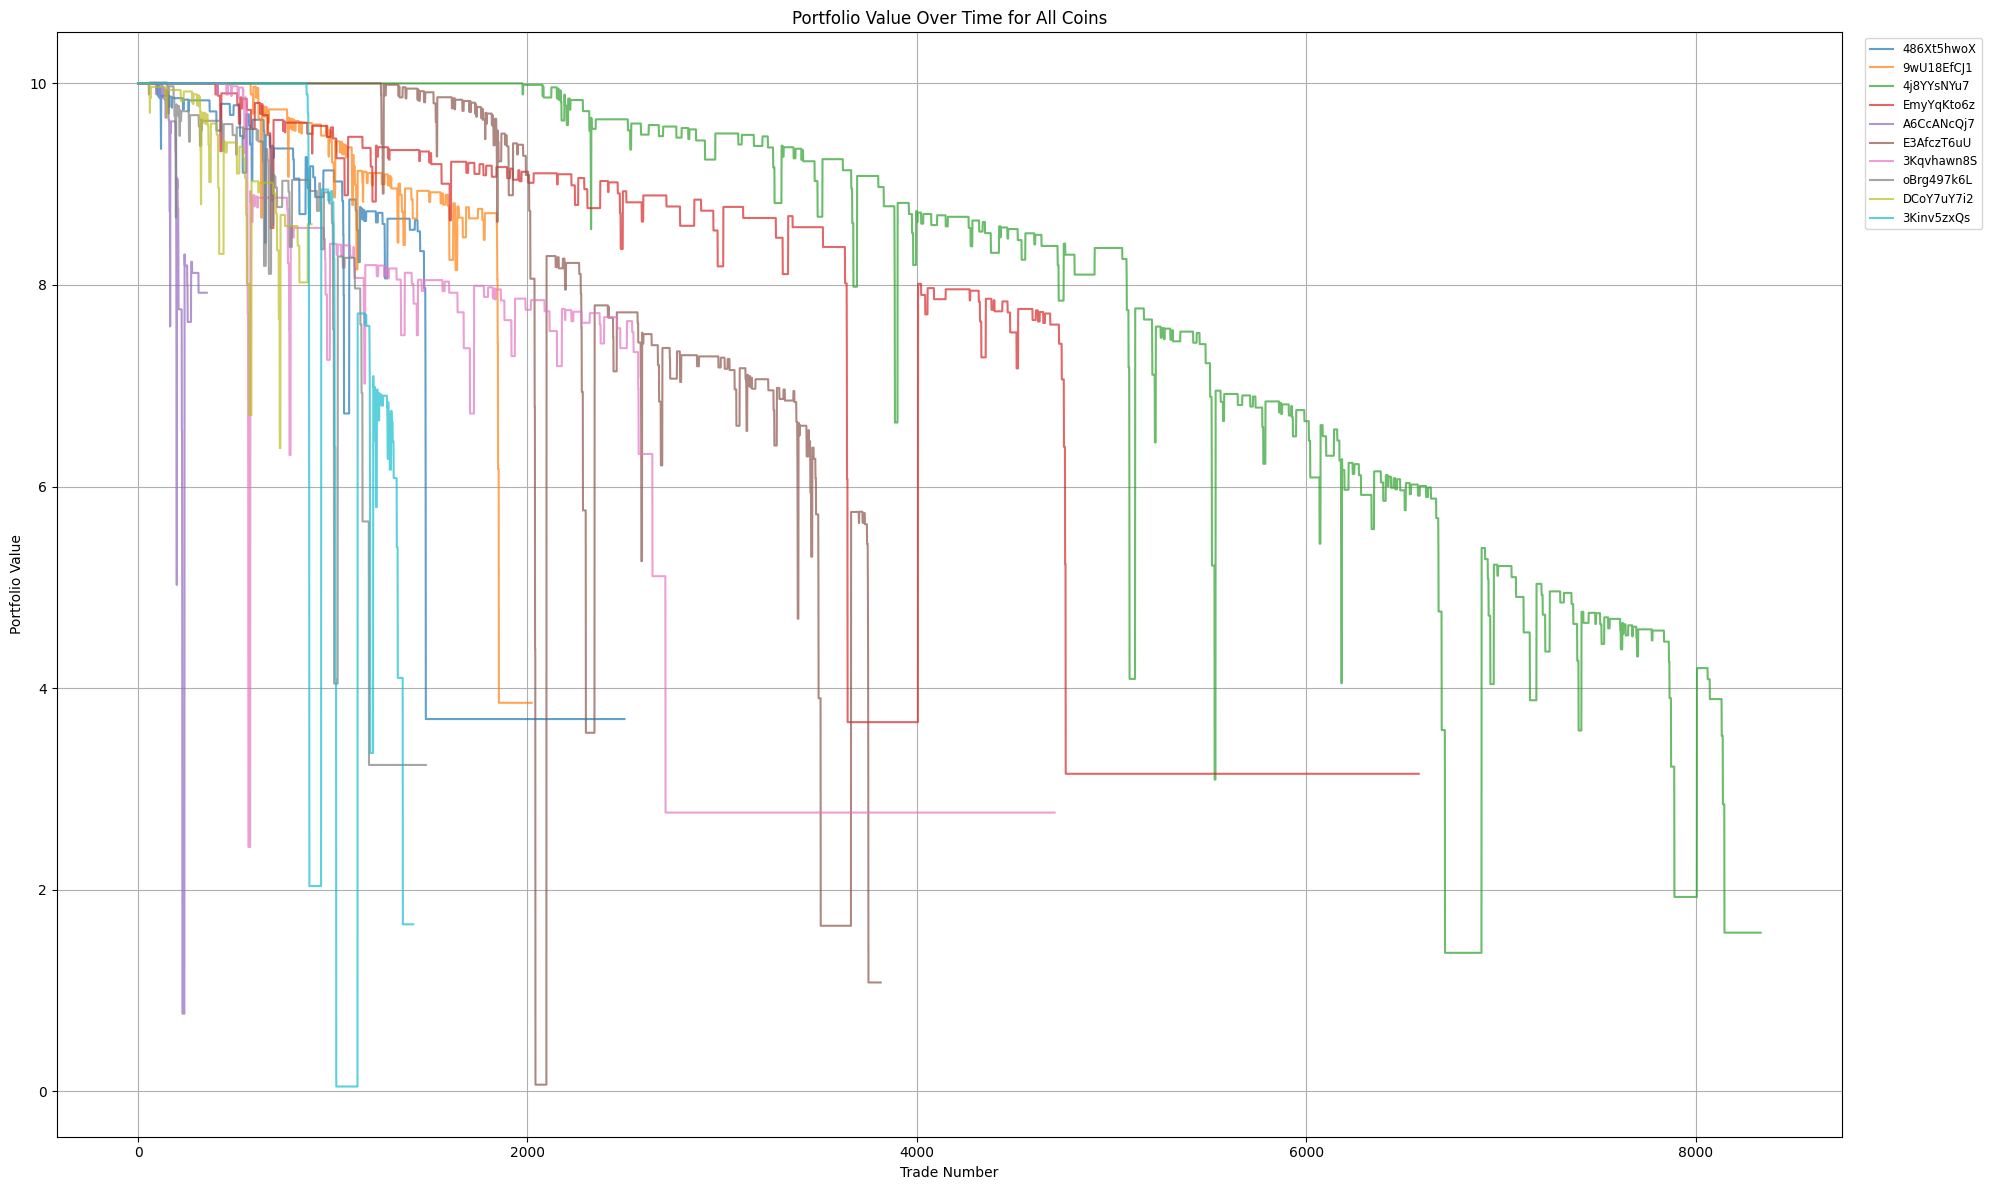

In [21]:
from utils.plotting_utils import *
plt.rcParams['figure.figsize'] = [18, 20] # Adjust as desired
plt.rcParams['figure.dpi'] = 100
# The %matplotlib inline is for Jupyter/Colab environment and should be run directly in a cell,
# For a script, you manage matplotlib output differently (e.g., plt.savefig)
%matplotlib inline

# Step 3: Plot all portfolio histories on one chart
plot_all_portfolio_histories_by_time(all_portfolio_histories, title="Portfolio Value Over Time for All Coins")
plot_all_portfolio_histories(all_portfolio_histories, title="Portfolio Value Over Time for All Coins")



--- Plotting best performing coin: DCoY7uY7i2 ---

Plotting: Backtest for DCoY7uY7i2


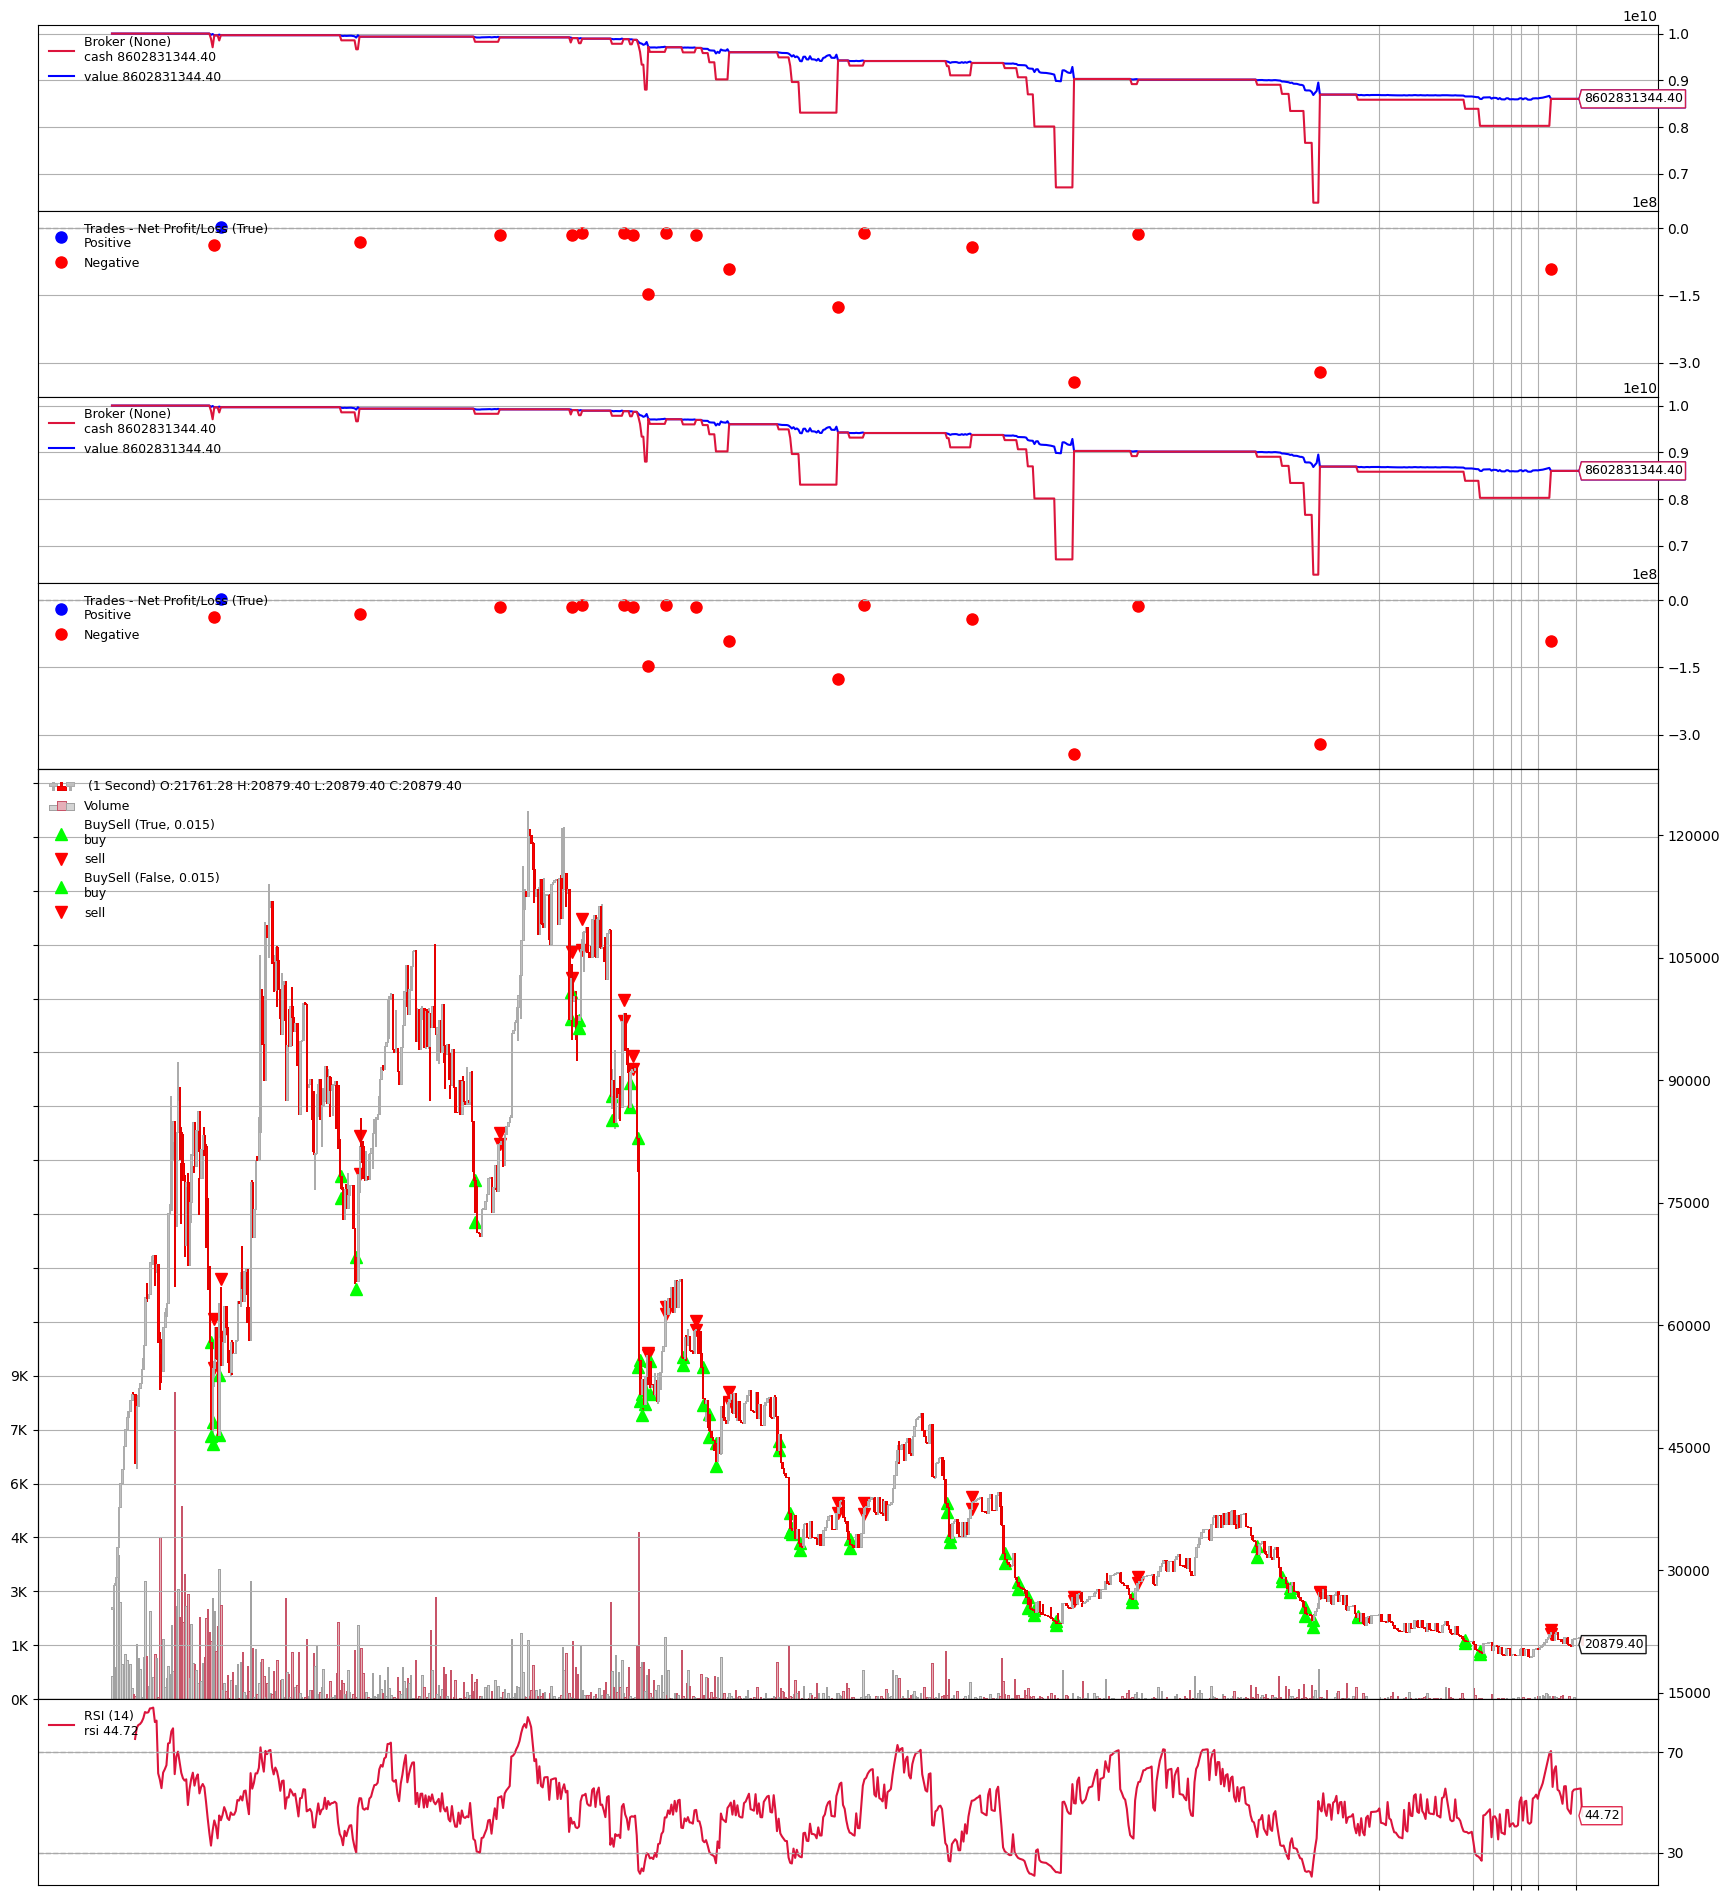

<Figure size 1800x2000 with 0 Axes>

In [22]:

# Step 4: Select an interesting backtest and plot it
# You can choose based on 'sharpe_ratio', 'final_value', etc.
# For example, let's plot the coin with the highest final value
best_coin_row = all_results_df.loc[all_results_df['final_value'].idxmax()]
best_coin_name = best_coin_row['coin']

print(f"\n--- Plotting best performing coin: {best_coin_name} ---")
if best_coin_name in all_cerebros_objects:
    plot_single_backtest(all_cerebros_objects[best_coin_name], title=f"Backtest for {best_coin_name}")
else:
    print(f"Cerebro object for {best_coin_name} not found.")

# You can also manually select a coin to plot, e.g.:
# plot_single_backtest(all_cerebros_objects['coin_0'], title="Backtest for coin_0")